## Primi 100 comuni per superficie

[    Pos.     Comune         Regione        Provincia Superficie (km²)
0      1       Roma           Lazio             Roma         1 287,24
1      2    Ravenna  Emilia-Romagna          Ravenna            65381
2      3  Cerignola          Puglia           Foggia            59392
3      4       Noto         Sicilia         Siracusa            55498
4      5    Sassari        Sardegna          Sassari            54703
..   ...        ...             ...              ...              ...
95    96    Dorgali        Sardegna            Nuoro            22653
96    97     Urbino          Marche  Pesaro e Urbino            22649
97    98      Cagli          Marche  Pesaro e Urbino            22646
98    99     Ostuni          Puglia         Brindisi            22556
99   100    Alghero        Sardegna          Sassari            22541

[100 rows x 5 columns]]
   Pos.   Comune         Regione Provincia Superficie
0     1     Roma           Lazio      Roma   1 287,24
1     2  Ravenna  Emilia-R

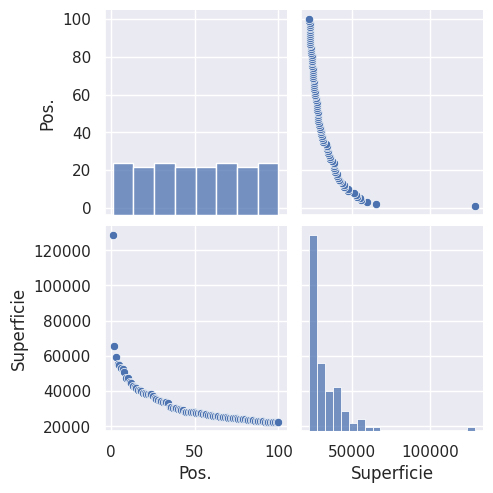

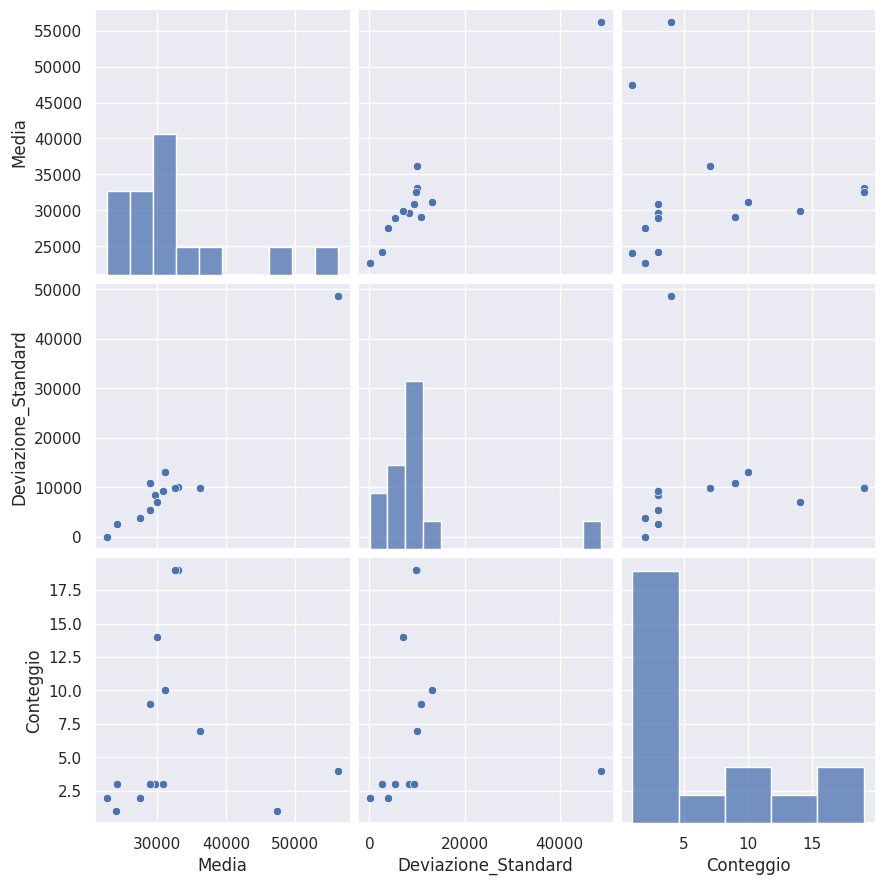

In [1]:
import pandas as pd

# !pip install jupyter-summarytools -q
from summarytools import dfSummary

import seaborn as sns

import matplotlib.pyplot as plt
#%matplotlib inline

preview_window=2
url_superficie = "https://it.wikipedia.org/wiki/Primi_100_comuni_italiani_per_superficie"
comuni_superficie = pd.read_html(url_superficie, attrs={"class":"wikitable"}, header=0)

print(comuni_superficie)
comuni_superficie = comuni_superficie[0]
comuni_superficie = comuni_superficie.rename(columns={'Superficie (km²)': 'Superficie'})
print(comuni_superficie.head(preview_window))

print("\n\n")
print("Preprocess ------------------------")
print("Controllo rimpiazzo spazi e virgole")
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].str.replace(' ', '').str.replace(',', '.')
comuni_superficie['Superficie'] = comuni_superficie['Superficie'].str.replace(',' , '').str.replace(r'\s', '', regex=True)
print(comuni_superficie.head(preview_window))

print("")
print("Converto superficie numerica")
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].astype(float)
#comuni_superficie = pd.to_numeric(comuni_superficie['Superficie Rate']) 
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].astype(dtype = float, errors = 'coerce')
comuni_superficie['Superficie'] = pd.to_numeric(comuni_superficie['Superficie'], errors = 'coerce')
print(comuni_superficie.head(preview_window)) # coerce transform not numeric in NaN

print("")
print("Rimuovo NaN")
comuni_superficie.dropna()
print(comuni_superficie.info())
print(comuni_superficie.head(preview_window))

print("\n\n")
print("Raggruppamento ------------------------")

print("Media superficie per regione NaN")
media_sup_per_regione = comuni_superficie.groupby('Regione', as_index=False)['Superficie'].mean()
#comuni_superficie.groupby('Regione').mean()
media_sup_per_regione = media_sup_per_regione.rename(columns={'Superficie': 'Superficie media comuni'})
print(media_sup_per_regione)

print("")
print("Varie statistiche per regione")
#reg = comuni_superficie.groupby('Regione')
#reg.aggregate([np.mean, np.std, pd.Series.count])
reg = comuni_superficie.groupby('Regione')['Superficie'].agg(
    Media='mean',       # Calcola la media
    Deviazione_Standard='std',  # Calcola la deviazione standard
    Conteggio='count'   # Calcola il conteggio
)
print(reg)

print("")
print("Solo conteggio")
print(comuni_superficie.groupby('Regione')['Superficie'].count())

print("")
print("Conteggio e riordino")
print(comuni_superficie.groupby('Regione')['Superficie'].count().sort_values(ascending=False))


print("\n\n")
print("Seaborn plot ------------------------")
dfSummary(comuni_superficie)
sns.set(color_codes=True)
sns.pairplot(comuni_superficie);
#https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot
plt.show()


sns.pairplot(reg, height=3, aspect=1);
plt.show()

In [2]:
print("\n\n")
print("Sommario ------------------------")
dfSummary(comuni_superficie)




Sommario ------------------------


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Pos.[int64],Mean (sd) : 50.5 (29.0)min < med < max:1.0 < 50.5 < 100.0IQR (CV) : 49.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZFJREFUeJzt17FqwlAcRvH/DVZMlQSR6gP0DRx9iD5sH8IncOjSyU2QEDFVWmw6CQ5qSZee4fzWmy83w0EwtW0bEkX23x8gXerdO0wp5RHR/+O7s4j4duv2is+2bQ/XDm4GmVLKJ5PJS1EU4663nU6nh6Zpnkej0XuWZV9u3V7a7XZVSun1WpT3fiH7RVGMF4vFoSzLY5cL1+v1eLVaPc3n87fZbFa5dXtW1/VguVyOt9ttPyI6BRkREWVZHqfT6UeXS6uqyiMihsOhW7fX5LcO/FMjFIMUikEKxSCFYpBCMUihGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKAYpFIMUikEKxSCFYpBCMUihGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKAYpFIMUikEKxSCFYpBCMUihGKRQDFIoBimU3m8P1HU96PrS/X4/iIhommaw2Wwe3bo9+62nH3FcOdpyh5S4AAAAAElFTkSuQmCC"">",0(0.0%)
2,Comune[object],1. Alghero2. Roma3. Ravenna4. Cerignola5. Bagno di Romagna6. San Vito7. Arzachena8. Reggio Emilia9. Corleone10. Forlì11. other,1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)90 (90.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA6RJREFUeJzt3EFqG1kYRtFfwiTRpIQweBlegBfRi+1FaAHehzGuQZRkogwCoYcdO74KyjlzQw0uT1TxPm/O5/NAYXvpB+DvITYyYiMjNjJiIyM2MmIjIzYyYiOzmZndzHyYmW/n8/l04efhit3c3t7+syzLYV3X581m86/geC/bZVkO9/f3syzLYX6ccPAutjMzu93u66UfhOvnBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhsZ2ZOp9PHSz8I12+7ruvz4+PjrOv6PDPfLv1AXC8bBDIb/zKLipONjHUVGesqMtZVZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsg42cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuBZOxuCFjBcEMn5GyVhXkbGuImNdRcYLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRcCydjXUXGyUbG4IWMwQsZgxcyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrVwMgYvZJxsZAxeyBi8kDF4IeOjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYGgYx1FRknGxnrKjLWVWSsq8j4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZ18LJGLyQcbKRMXghY/BCxuCFjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBCxkvCGT8jJKxriJjXUXGuoqMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIuBZOxrqKjJONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsj892SD/+PVv4A/By+/+4m4Tm8ZRt0sy3J4eHg47ff7L+/xcFyPl5eXT8fj8fD09PRhZn49tpmZ/X7/5e7u7vNvfzqu0e61f+ijLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mbmR9XRy79IPz53trJzbquz8fj8TBvuDrC3+MtwyjXwvlVr74WbvBCxgsCGbGRERsZsZERGxmxkREbGbGRERuZ73SSt8V+I1ieAAAAAElFTkSuQmCC"">",0(0.0%)
3,Regione[object],1. Puglia2. Sicilia3. Toscana4. Emilia-Romagna5. Sardegna6. Umbria7. Lazio8. Marche9. Veneto10. Basilicata11. other,19 (19.0%)19 (19.0%)14 (14.0%)10 (10.0%)9 (9.0%)7 (7.0%)4 (4.0%)3 (3.0%)3 (3.0%)3 (3.0%)9 (9.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAABARJREFUeJzt3E1qG1kARtGnxoTORMIYvBgvohfbi9BujLEGSchEGWSUWAr1o7ox+JwNlAeXJ6p4n3fn83lA4Z+//QfwcYiNjNjIiI2M2MiIjYzYyIiNjNjI7MYYn8cYn+Lnfj+fz1/jZ/KX3T08PPy33+/vy4eeTqeX3W73v+A+lrv9fn//9PT09XA4fCse+Pr6+u/xeLx/fn7+NMYQ2wdyN8YYh8Ph2+Pj45fwuZ/DZ/FOeEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyd2P8vGNWPbB8Fu/L3el0ejkej/cjvGN2Op1exhjfq+fxPtggkNn5l1lUnGxkrKvIWFeRsa4i46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFwLJ2PwQmbLk83pxS82G7wYtfC7TQYvRi1csuXgxaiFX/ioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmaTwYtRC5dsNngxauF3roWTMXgh4wWBzC1+Rv1cMsnqdZUVFVOtWldZUTHHLdZVVlRM4gWBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzKp1lRUVc6xeV1lRMZVr4WSsq8isOdmcaMyyePBi6MJciwYvhi4ssWbwYujCLD7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVk0eDF0YYnFgxdDF+ZyLZyMwQuZuSeb04zFZg1ejFxYY/LgxciFteYOXoxcWMxHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIzN5XWVRxVqz1lUWVaxhg0DGuorMn042pxg3dXVdZUnFrV1cV1lSsYU/ra

# EDA

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/EDA2.jpg" width=800 >

## Iris dataset

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png" width=800 >

In [3]:
#from IPython.display import Image
#Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/EDA.jpg',width=600,height=600)
#Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png',width=900,height=300)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from summarytools import dfSummary
import seaborn as sns
sns.set(color_codes=True)

#%matplotlib inline
preview_window=2
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'


df = pd.read_csv(dataset_path, header=None)


print("\n\n")
print("Preview dataset ------------------------")
print(df.head(preview_window))


print("\n\n")
print("Column header ------------------------")
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print(df.head(preview_window))


print("\n\n")
print("Test NaN ------------------------")
print(df.info())

print("\n\n")
print("Test Stat ------------------------")
print(df.describe())

print("\n\n")
print("Count class balanced dataset ------------------------")
print(df.groupby('class').count())

print("\n\n")
print("Count class balanced dataset ------------------------")
print(df.groupby('class').count())

print("\n\n")
print("Sommario ------------------------")
dfSummary(df)




Preview dataset ------------------------
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa



Column header ------------------------
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa



Test NaN ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None



Test Stat ------------------------
       sepal length  sepal width  petal length  petal width
count

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,sepal length[float64],Mean (sd) : 5.8 (0.8)min < med < max:4.3 < 5.8 < 7.9IQR (CV) : 1.3 (7.1),35 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmdJREFUeJzt3UGO2jAUgOHnZkABpEQICXZcoFIXLDlED9sjdMEJuAE7JBQFkU5EMOmGkUaVOjROUr9x/m/vmSx+hdgmxtR1LYAWX3xfAPDei+8L6JoxZiIiY8fh17quX7u8HjQTVJDGmMlisfieJMncZfz5fM6MMT+I0p+gghSRcZIk8+12+5qmadlkYJ7n8W63m59Op7GINA6SO3M3QgtSRETSNC2Xy+Uvh6ETl//Hnbk7QQbpgbc7c2gIskP/+84cIpZ9oApBQhWChCq9PUOyDAIXvQTJMghc9XWHZBkETnpd9mEZBE0xqYEqBAlVCBKqECRUIUioQpBQhSChCl8/U8BaOxKRxBjjMjyobVaC9KwoilFVVd/W63UURVGjXS2R8LZZCdKz6/X6EsfxdLPZlKvVKmsyNsRtVoJUYjabsc0qTGqgDHfId1pMLpL7/T7q4ZIGhyAf2kwuqqqKrbVfy7L8KSIuH7t4IMiHNpOLw+Ew3+/309vtFvV1fUNBkH9wmVxkWRbUxMInlUHyLDdc6oLkWW7Y1AXJs9ywqQvyDc9yw8TCOFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqfLgw3uKMR/aU4eSvQbY545E9Zbj66A7pfMYje8pw9XQv2+WMR/aU4YpJDVQhSKii9utn+De+jmHp61c2CPIT83UMS5+/skGQn5jHY1h6+5UNggyA6zEs1tpEWrxMl6Zp1vXxLwQ5UFpfpiPIgdL6Mh1BDpy2l+lYh4QqBAlVCBKqECRUIUioQpBQhSChytN1yDzP46Z/9HK5xCIiRVHEx+NxyljGvnnW02+a4ry3buon5AAAAABJRU5ErkJggg=="">",0(0.0%)
2,sepal width[float64],Mean (sd) : 3.1 (0.4)min < med < max:2.0 < 3.0 < 4.4IQR (CV) : 0.5 (7.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAntJREFUeJzt3U+PmkAYgPF3cDX4JxBjqjcvPTbpgaMfoh+2H6EHP4GHXvbkzcQQjHSJiPSySbdNVguDy+vw/O4TOTwBh2HAlGUpgBZe2wcAvPXU9gFoYowZisig5vBTWZYvTR5PFxHkK2PMcDabfQuCYFpn/OFwiI0x34nSDkH+MQiCYLparV7CMMyqDEySxF+v19P9fj8QEYK0QJD/CMMwm8/nv2oMHTZ+MB3EpAaqECRUIUioQpBQhSChCkFCFYKEKtyHbEhRFH0RCYwxdYaz7PiKIBuQpmk/z/Ovy+Wy1+v1Kq3yiLDs+BZBNuB0Oj35vj+KoihbLBZxlbEsO/6NIBs0Ho9ZdrTEpAaqECRUIUioQpBQhSChCkFCFYKEKgQJVZy7MW6xlTW4XC79po8H1TgVpM1W1jzP/aIovmRZ9kNE6qy2oAFOBSkWW1m32+10s9mMzudz714Hh9tUBml72Q3DMK66phzHMevJCqgLkstut6kLUrjsdprGIEWk3hskuOw+Pu5DQhWChCoECVUIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUUfu0D/6Pa5/DI8gH5uLn8AjysTn3OTyCdIBLn8MjSAUs3k/u3F5ygmyZzfvJXdzURpAts3k/uYub2u4WJK80qabO+8ld3NR2lyDZW4267nWGZG81arnrf0j2VqMq1rKhytUzJBMTfLR3g2RigjZcO0MyMcGHuzmpYWLiLstPKnsicqn50+8+9sZKTUfZLFkWRdFP0/TzZDJ59jwvr/rb1x57I8iOamDJ8lMURT+b/hzzzSCTJPGr/KCIyPF49EVE0jT1d7vdiLF6x2rzG3kDh1B4KP25AAAAAElFTkSuQmCC"">",0(0.0%)
3,petal length[float64],Mean (sd) : 3.8 (1.8)min < med < max:1.0 < 4.3 < 6.9IQR (CV) : 3.5 (2.1),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAlxJREFUeJzt3M2K2lAYgOHvNCpRIUEE3XkDhS5cehG92F5CF16Bd+BOEImYmWBM0kULYwvVyTE/X07eZzucEJiXmPNDTFEUAmjxpe0bAO4NHv3RGDMWkZHlta9FUbxbjkVP/TdIY8x4Pp9/D4JgZnPh8/l8Msb8IEqU8egJOQqCYLbZbN7DMEzKXDSKIn+73c6Ox+NIRAgSn/bwJ1tEJAzDZLFYvFlce2wxBj3HpAaqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqjzdqUH9OMTygSBbxiGWvxFk+zjEcocgleAQy29MaqAKT8iKvDAxCfI8H1Z9P11FkBV4ZWKSpqmfZdnXJEl+iojNT7ZTCLIa1hOT/X4/2+12k9vt5tV1c11CkBWymZicTienJiWvYlIDVQgSqhAkVCFIqEKQUIUgoQpBQhWChCoECVXYqem4LMuGIhIYY2yGqzttTpAdFsfxME3Tb6vVyvM8r9QeuojO0+YE2WHX63Xg+/5kvV4ny+XyVGas1tPmBOmA6XTqzGlzJjVQhSChCkFCFYKEKgQJVWqbZbu2YItm1BKkiwu2aEYtQbq4YItm1Low7tKCrYs0vlaxU9NTWl+rCLKntL5WEWTPaXutYh0SqvCEvMMXzNpHkH/wBTMdCPIDXzBTgCD/wRfM2sWkBqrwhISVunZ5CBKl1bnLQ5Aorc5dHueCZC2xOXXs8jgVJGuJ3edUkMJaYue5FqSIsJbYZaxDQpWnT8goivyyF71cLr6ISBzH/uFwmJQZG0WRn2XZQOzWuII8zwdN3zNjP+/Z/+YXXpyMAOw7Yj8AAAAASUVORK5CYII="">",0(0.0%)
4,petal width[float64],Mean (sd) : 1.2 (0.8)min < med < max:0.1 < 1.3 < 2.5IQR (CV) : 1.5 (1.6),22 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAnpJREFUeJzt282OmlAYgOHv1FHxpxBjojtvoEkXLrmIXmwvYRYuu




pandas plot ------------------------
histogram


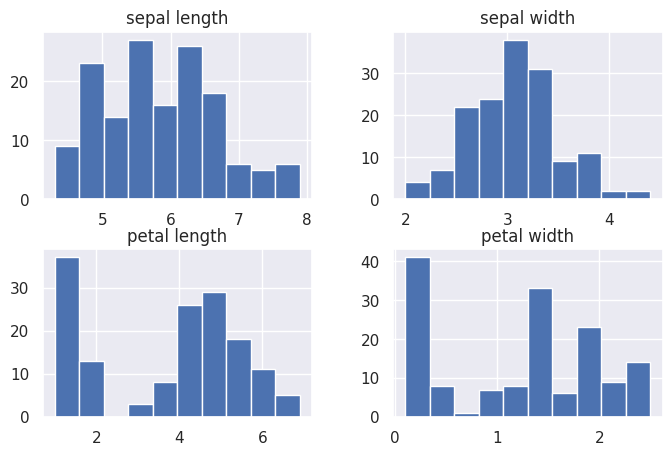


scatter matrix


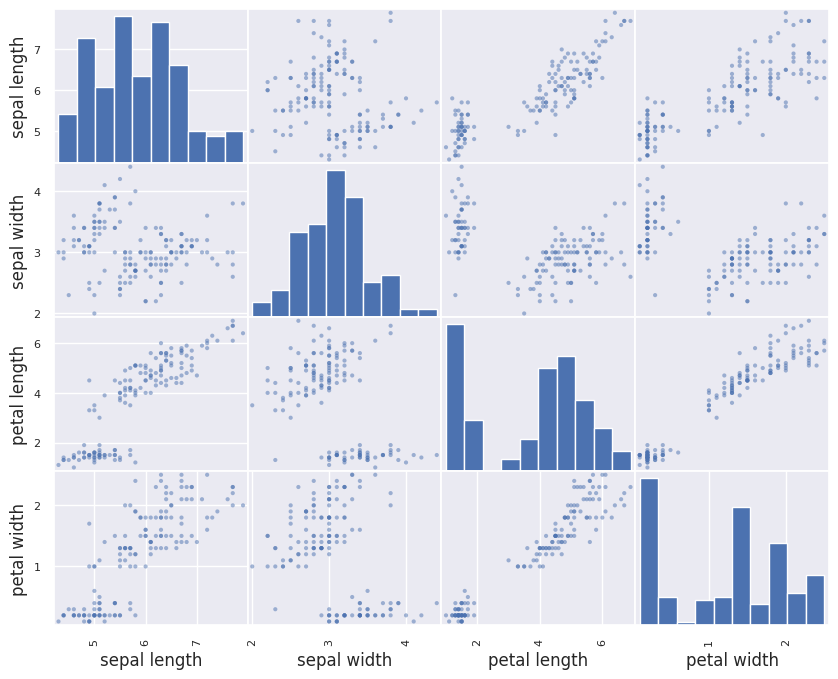


boxplot


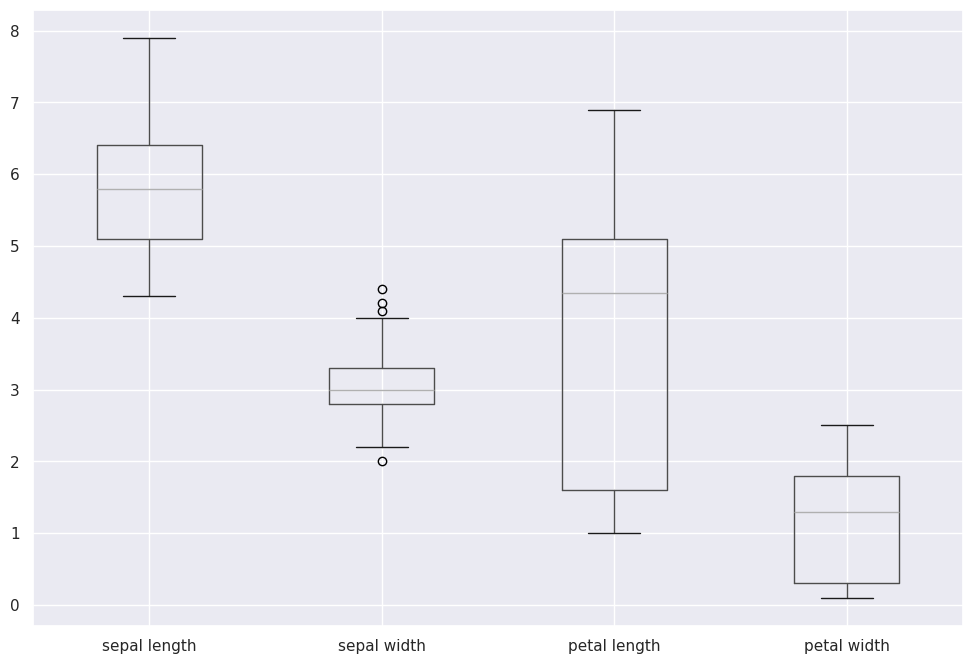


boxplot by class


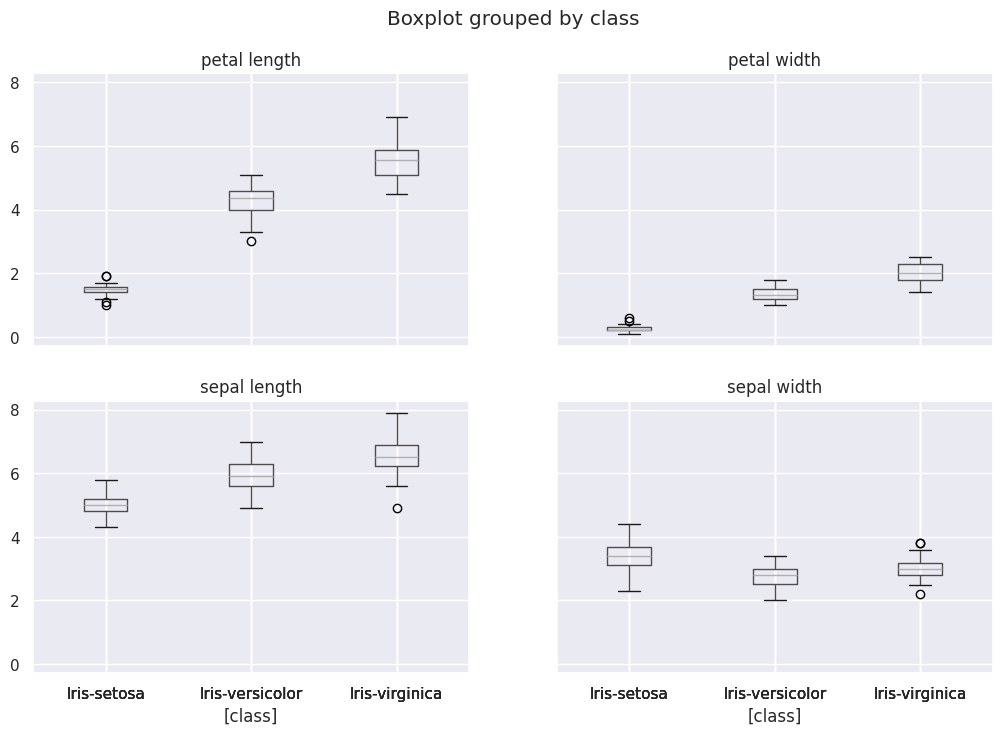


Count sepal width by class


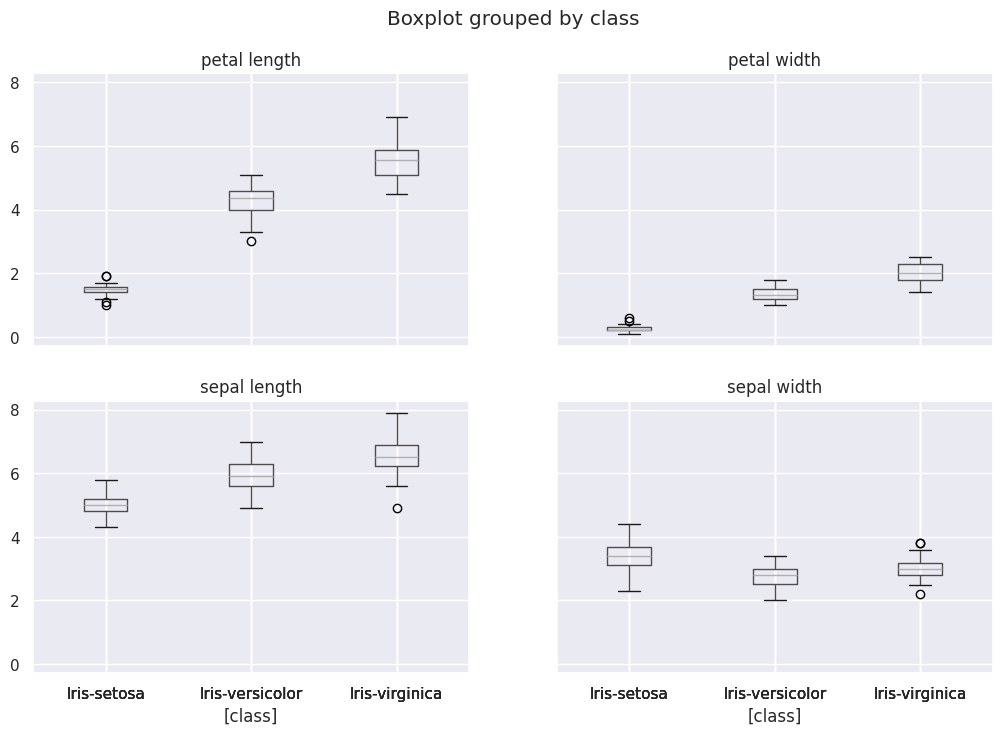


parallel_coordinates


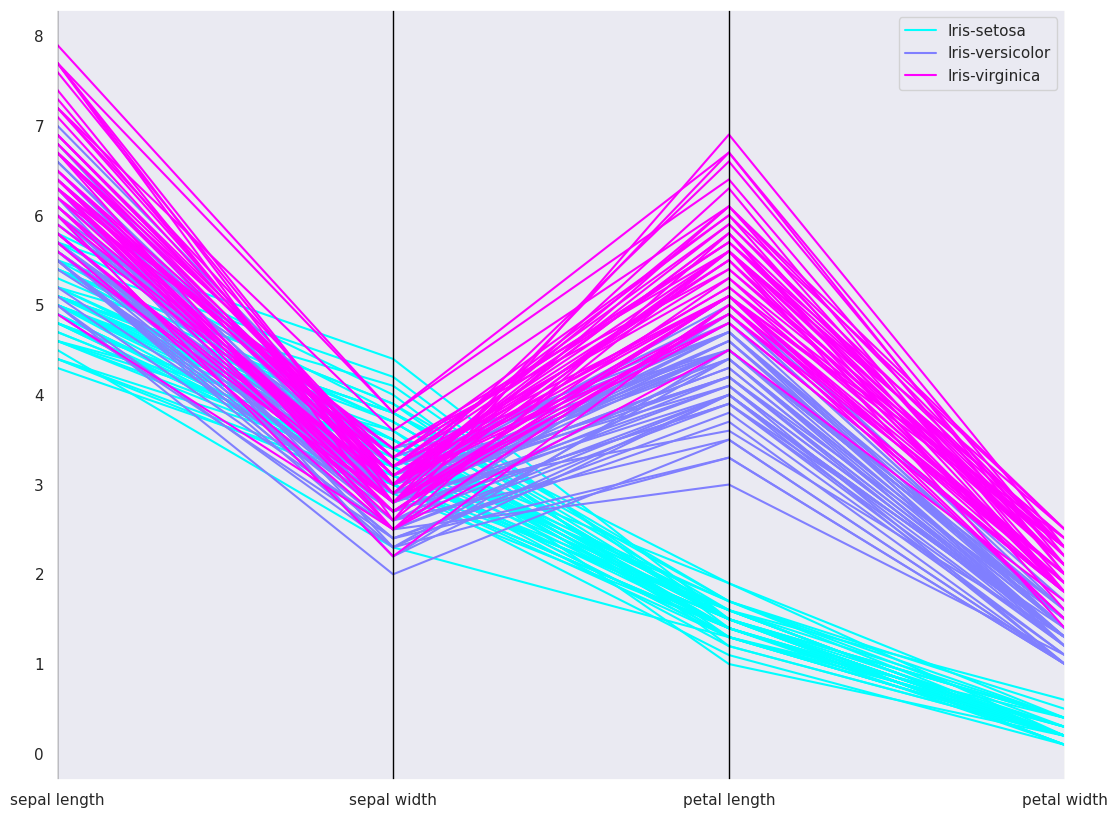




Seaborn plot ------------------------


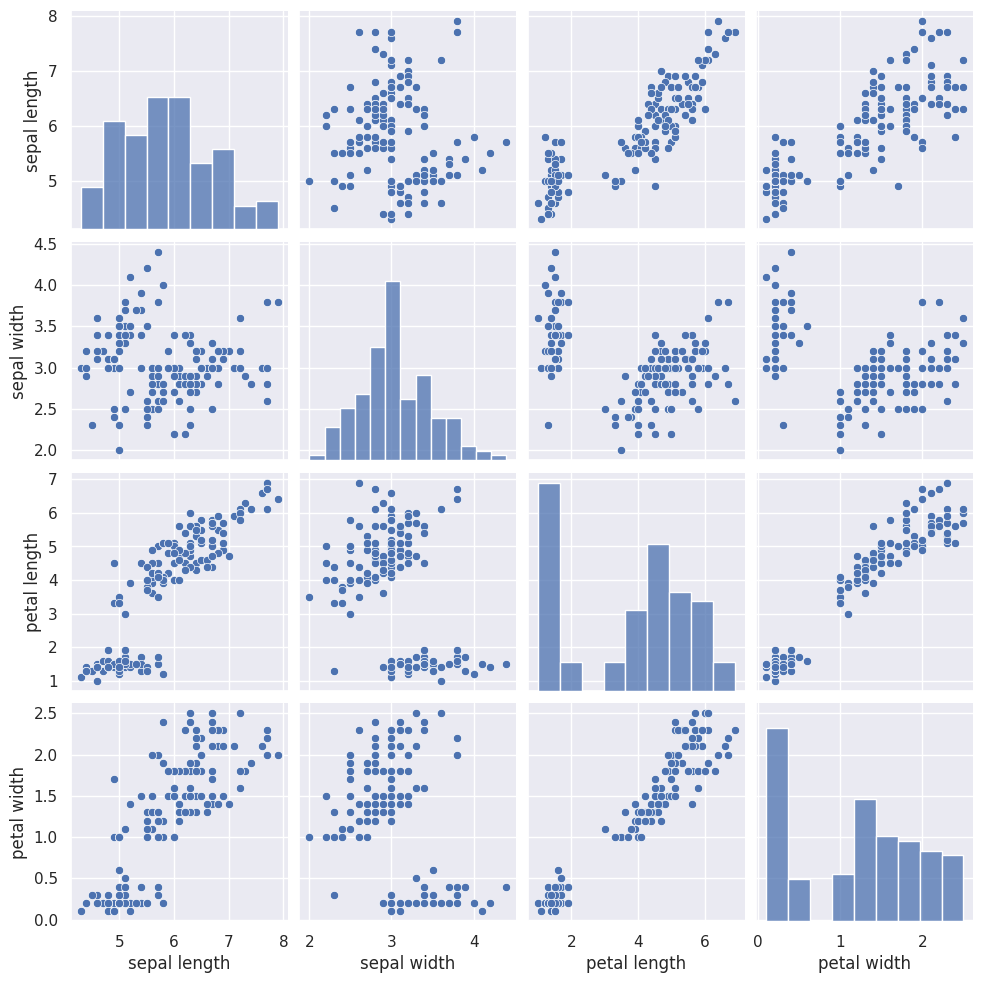


class colorcode


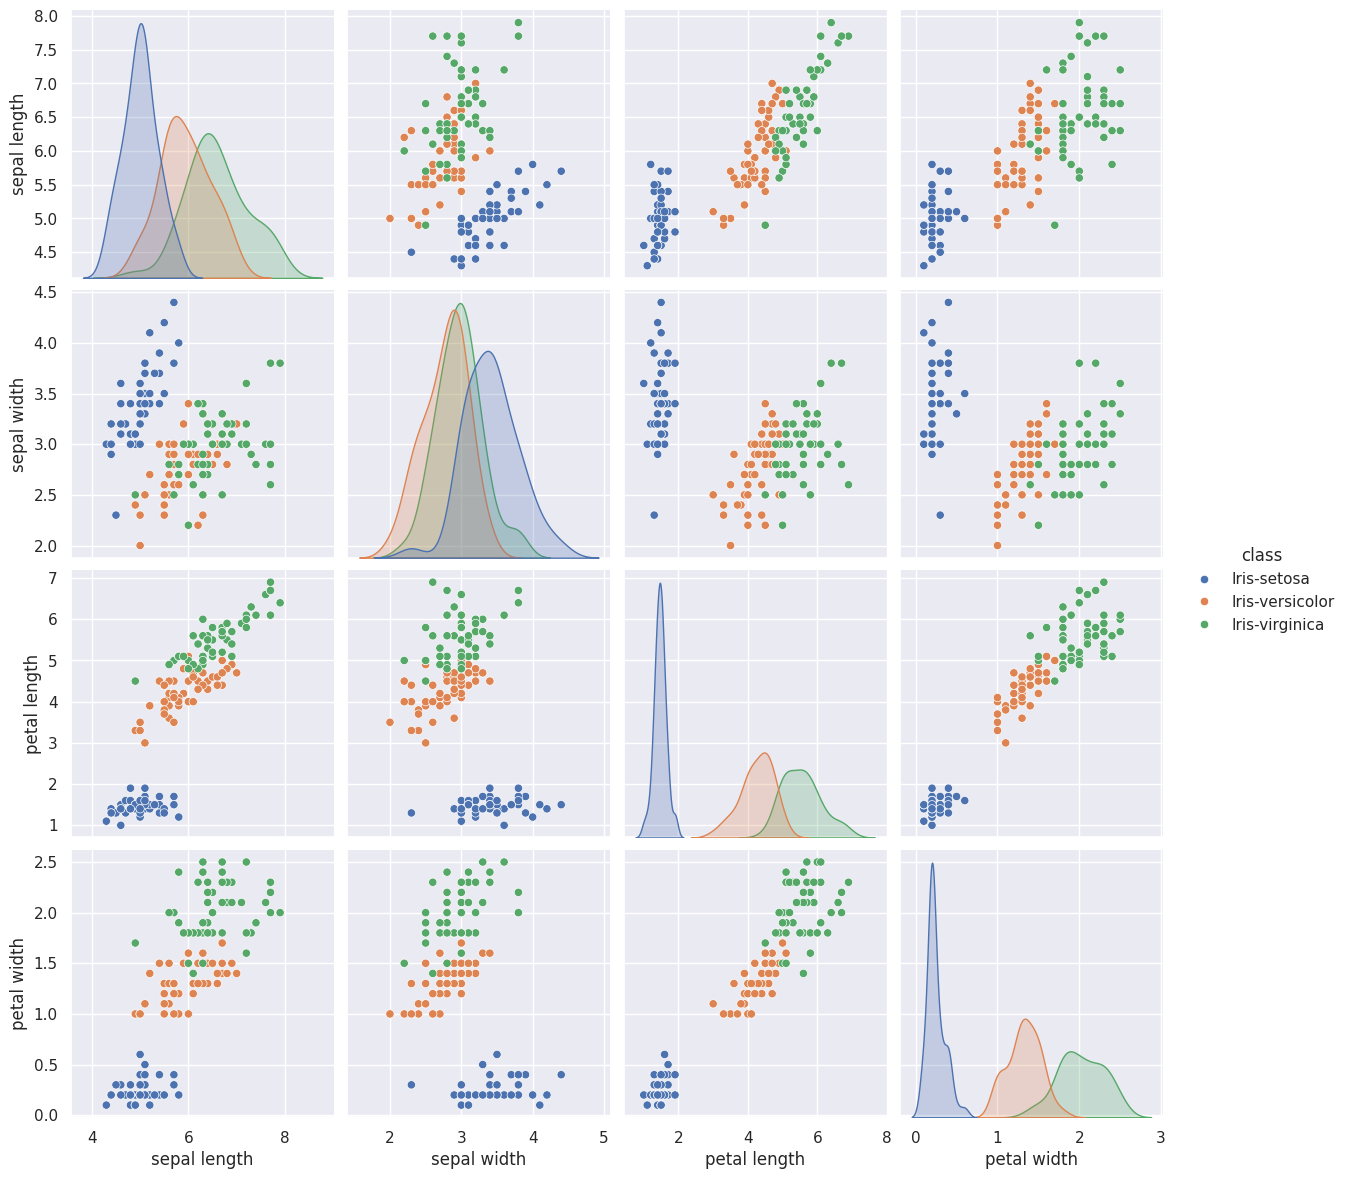


4 violinplot by class


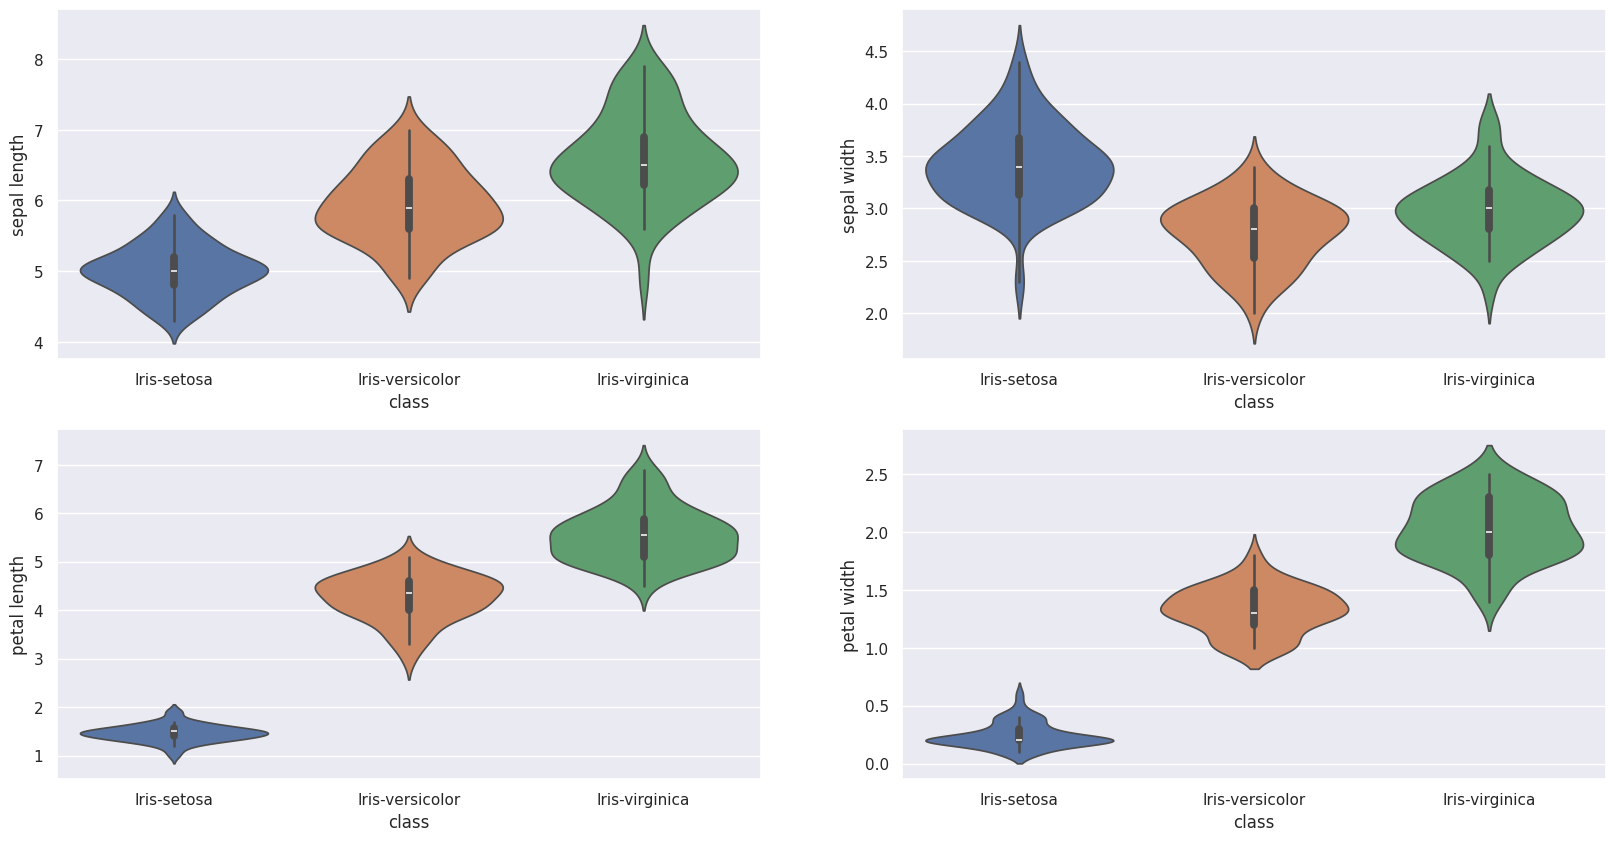


Class count istogram by sepal width


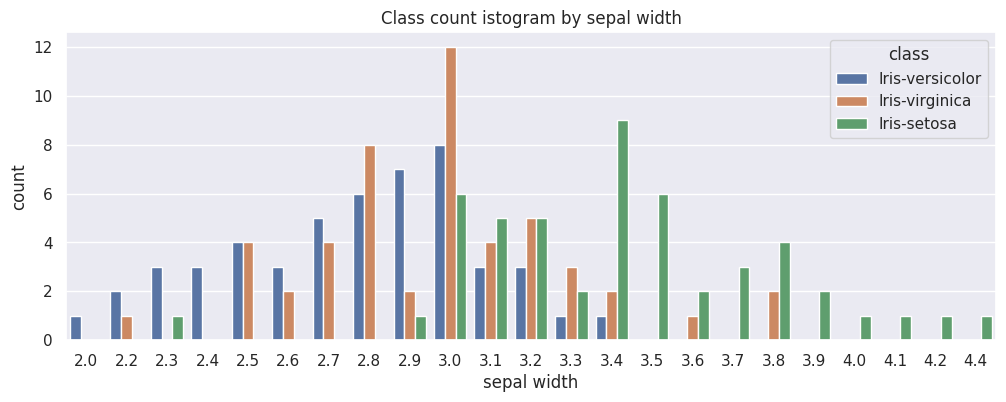


Tagged clustered by class


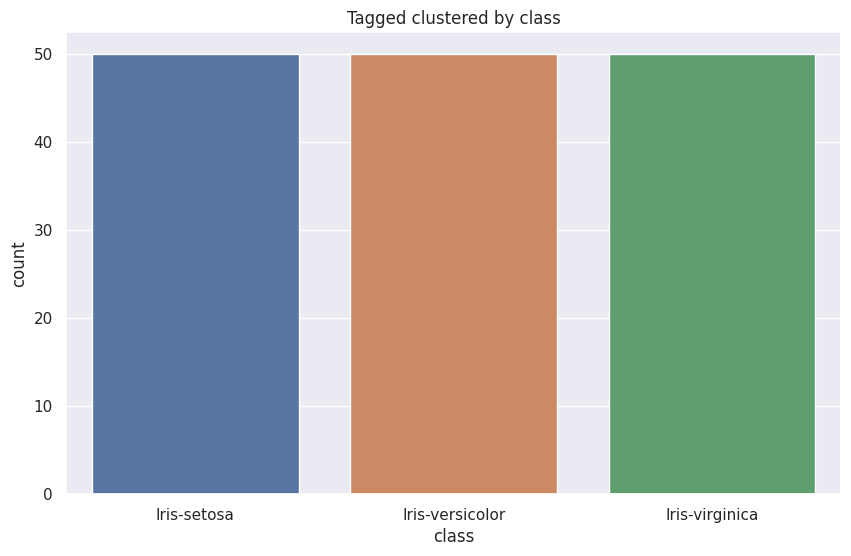


jointplot sepal length |  sepal width


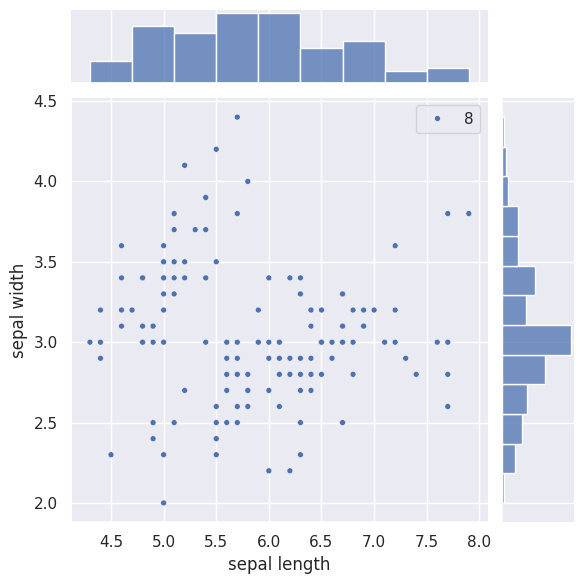


jointplot petal length |  petal width


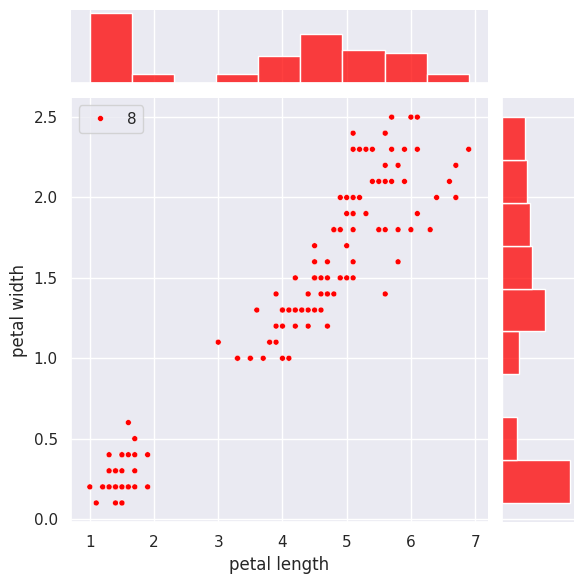


jointplot petal length |  petal width with class colorcode


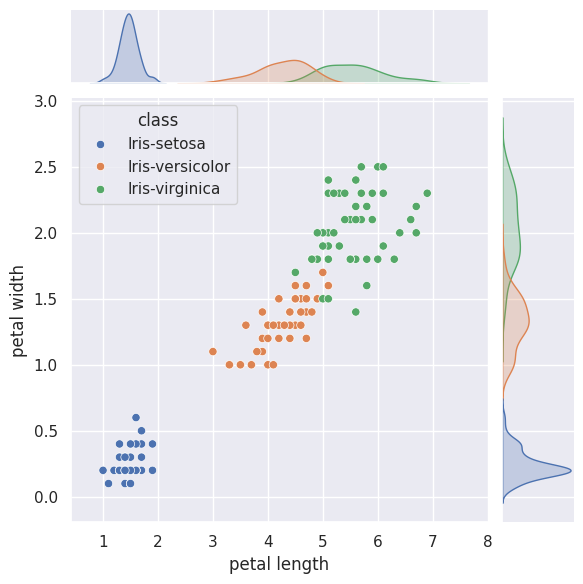


jointplot sepal length |  sepal width with class colorcode


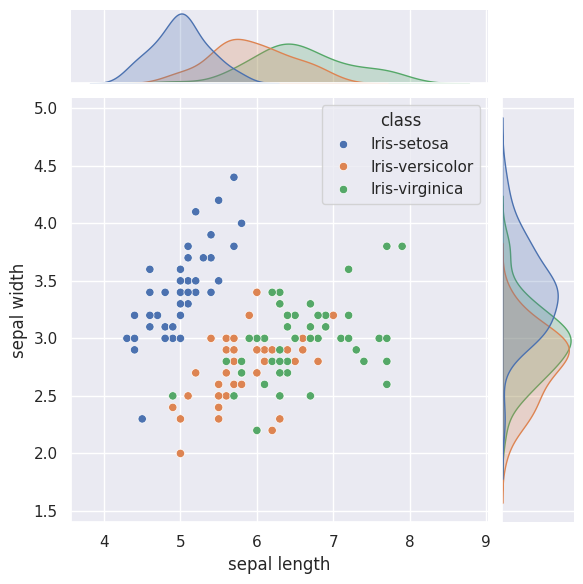


jointplot petal length |  petal width with class colorcode false fit


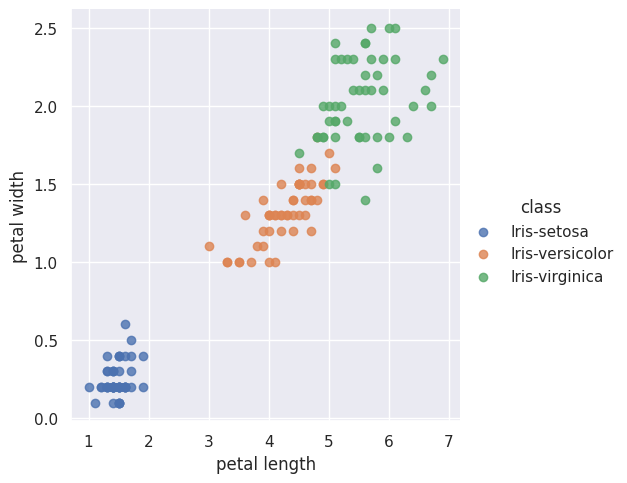


boxplot class | petal length  with class colorcode


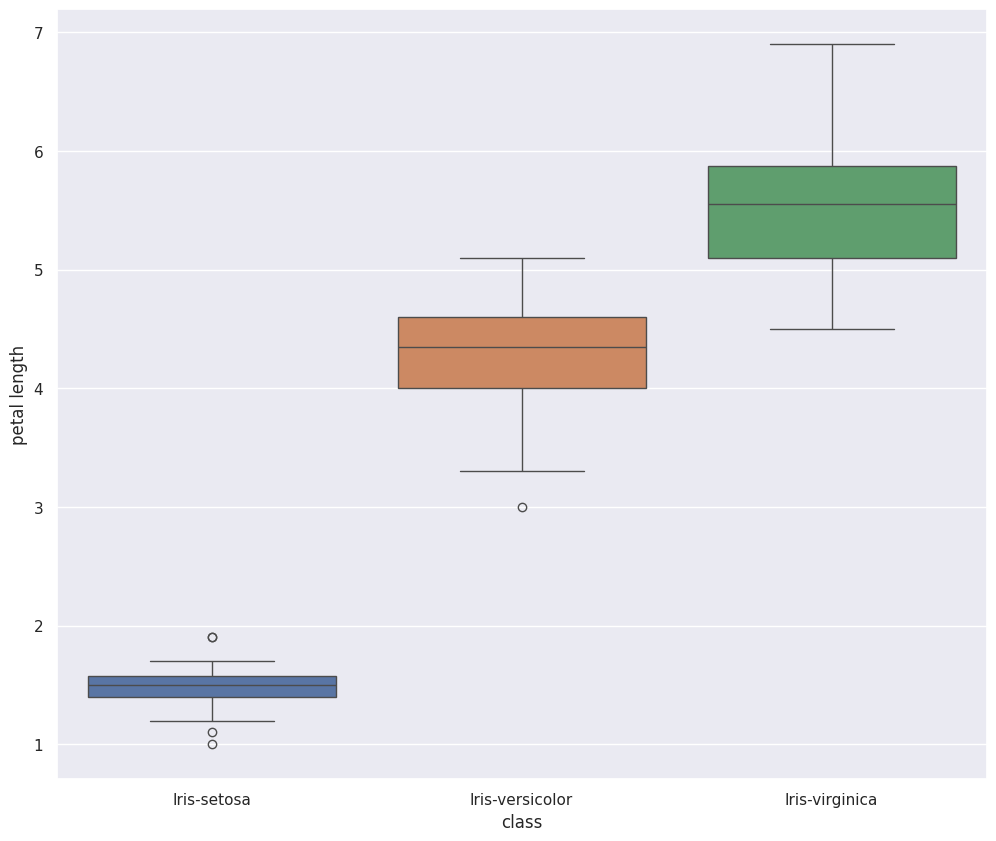


boxplot and stripplot class | petal length  with class colorcode


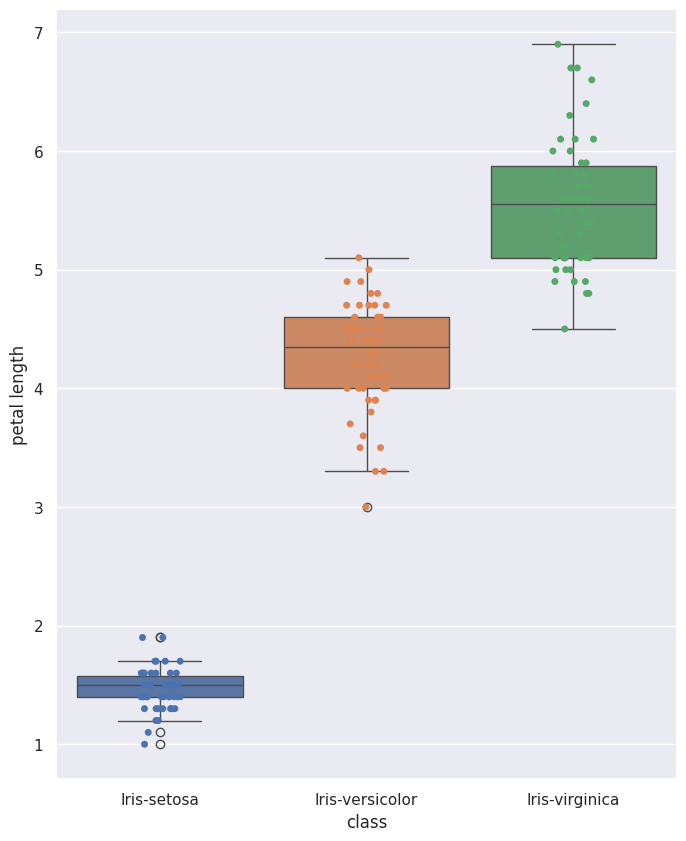


violinplot class | petal length  with class colorcode


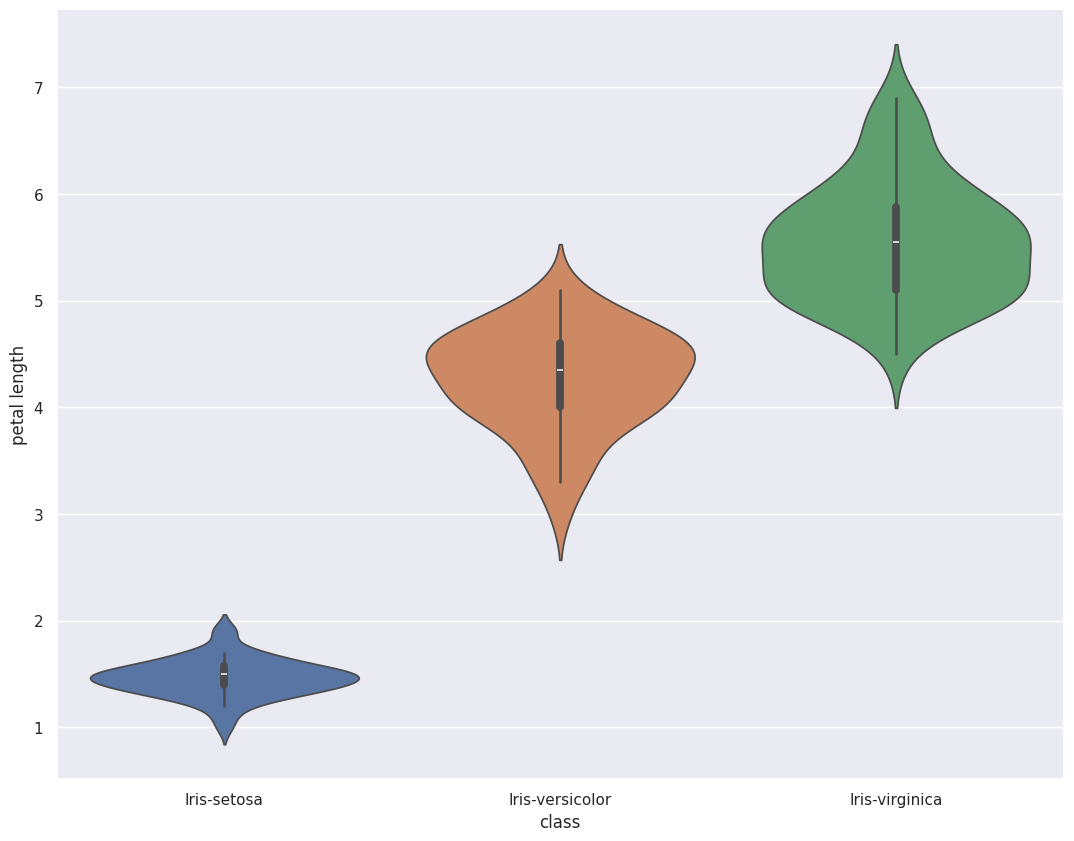


violinplot class | petal length  with palette colorcode by class


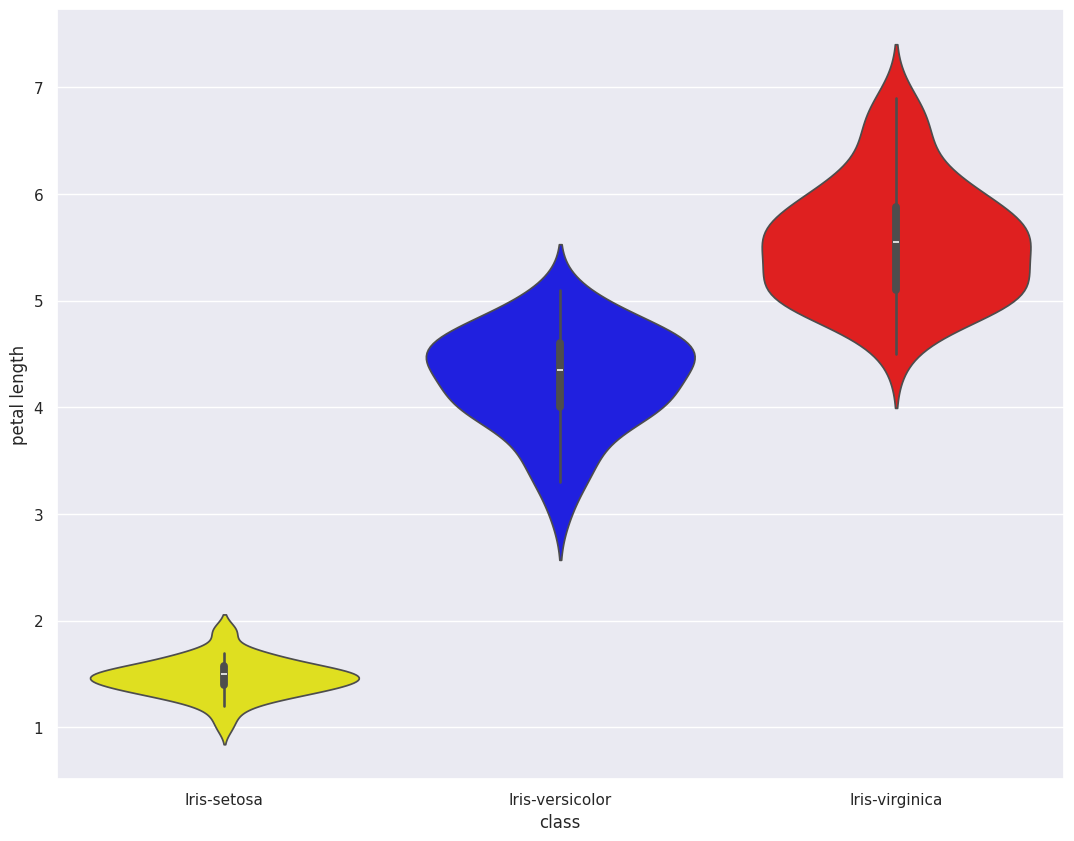

In [5]:



print("\n\n")
print("pandas plot ------------------------")
print("histogram")
df.hist(figsize=(8,5));
plt.show()

print("")
print("scatter matrix")
pd.plotting.scatter_matrix(df, figsize=(10,8));
plt.show()


print("")
print("boxplot")
df.boxplot(figsize=(12,8));
plt.show()

print("")
print("boxplot by class")
df.boxplot(by='class', figsize=(12,8));
plt.show()

print("")
print("Count sepal width by class")
df.boxplot(by='class', figsize=(12,8));
plt.show()


# from pandas.plotting import parallel_coordinates
print("")
print("parallel_coordinates")
plt.figure(figsize=(13,10));
pd.plotting.parallel_coordinates(df, "class",colormap='cool');
plt.show()


#print(help(sns.pairplot))

print("\n\n")
print("Seaborn plot ------------------------")
sns.set(color_codes=True)
sns.pairplot(df);
plt.show()

print("")
print("class colorcode")
sns.pairplot(df, hue='class', height=3, aspect=1);
plt.show()

print("")
print("4 violinplot by class")
plt.figure(figsize=(20,10));
# subplot su matrice 2x2
plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal length',data=df,hue="class")
plt.subplot(2,2,2)
sns.violinplot(x='class', y='sepal width', data=df,hue="class")
plt.subplot(2,2,3)
sns.violinplot(x='class', y='petal length', data=df,hue="class")
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal width', data=df,hue="class");
plt.show()

print("")
print("Class count istogram by sepal width")
plt.figure(figsize=(12, 4))
plt.title('Class count istogram by sepal width')
plt.legend('class')
sns.countplot(x='sepal width',data=df,hue='class');
plt.show()


print("")
print("Tagged clustered by class")
plt.figure(figsize=(10, 6))
plt.title('Tagged clustered by class')
sns.countplot(x='class', hue="class", data=df);
plt.show()


print("")
print("jointplot sepal length |  sepal width")
sns.jointplot(x="sepal length", y="sepal width", data=df, size=8);
plt.show()


print("")
print("jointplot petal length |  petal width")
sns.jointplot(x="petal length", y="petal width", data=df, size=8, color='red');
plt.show()


print("")
print("jointplot petal length |  petal width with class colorcode" )
sns.jointplot(x='petal length',y='petal width',hue='class',data=df)
plt.show()


print("")
print("jointplot sepal length |  sepal width with class colorcode" )
sns.jointplot(x="sepal length", y="sepal width",hue='class',data=df);
plt.show()

print("")
print("jointplot petal length |  petal width with class colorcode false fit" )
sns.lmplot(x="petal length", y="petal width",hue='class', data=df, fit_reg=False);
plt.show()


print("")
print("boxplot class | petal length  with class colorcode" )
plt.figure(figsize=(12,10))
sns.boxplot(x="class", y="petal length", data=df,hue='class');
plt.show()


print("")
print("boxplot and stripplot class | petal length  with class colorcode" )
plt.figure(figsize=(8,10));
sns.boxplot(x="class", y="petal length", data=df,hue='class');
sns.stripplot(x="class", y="petal length", data=df,hue='class');
plt.show()


print("")
print("violinplot class | petal length  with class colorcode" )
plt.figure(figsize=(13,10));
sns.violinplot(x="class", y="petal length", data=df,hue='class');
plt.show()


print("")
print("violinplot class | petal length  with palette colorcode by class" ) #palette
plt.figure(figsize=(13,10));
sns.violinplot(x="class", y="petal length",  palette={"blue","red","yellow"}, data=df , hue='class');
plt.show()

In [6]:
df = df.drop('class',axis=1)
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# try not supervised clustering 

Conteggio elementi per cluster:
 {1: 50, 2: 36, 3: 64}


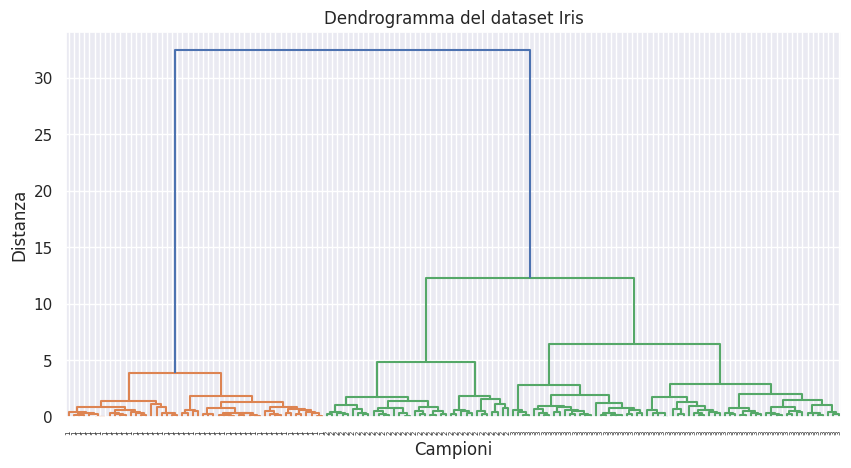

In [7]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

X = df.values # distance matrix
Z = sch.linkage(X, method='ward')

max_d = 10
clusters = sch.fcluster(Z, max_d, criterion='distance')

unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Conteggio elementi per cluster:\n", cluster_counts)

plt.figure(figsize=(10, 5))
sch.dendrogram(Z, labels=clusters)
plt.title("Dendrogramma del dataset Iris")
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.show()


Conteggio elementi per cluster:
 {1: 50, 2: 36, 3: 64}


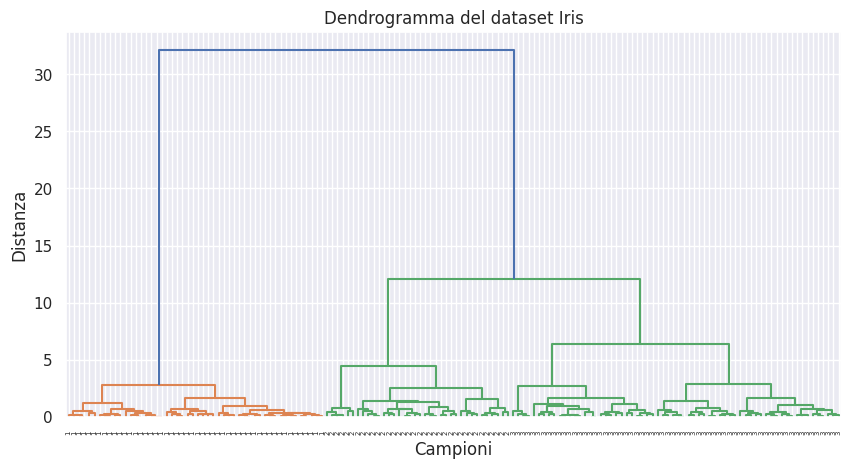

In [8]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

X = df.drop('sepal width',axis=1).values # distance matrix
Z = sch.linkage(X, method='ward')

max_d = 10
clusters = sch.fcluster(Z, max_d, criterion='distance')

unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Conteggio elementi per cluster:\n", cluster_counts)

plt.figure(figsize=(10, 5))
sch.dendrogram(Z, labels=clusters)
plt.title("Dendrogramma del dataset Iris")
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.show()

Conteggio elementi per cluster:
 {1: 50, 2: 46, 3: 54}


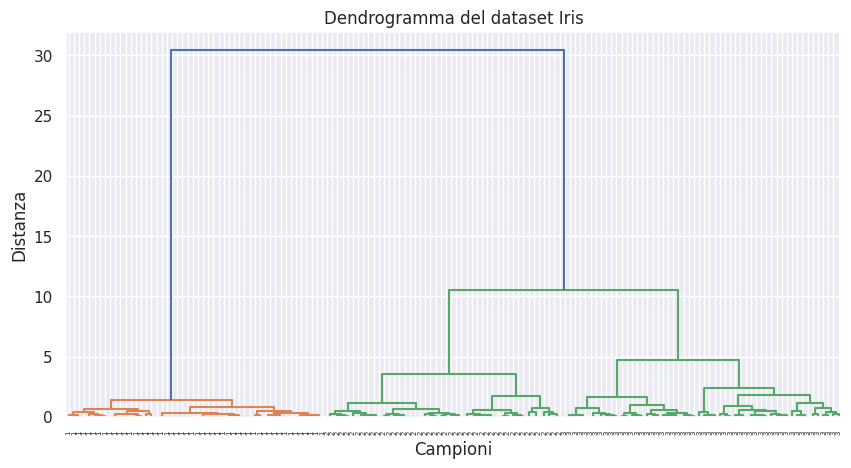

In [9]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

X = df.drop('sepal width',axis=1).drop('sepal length',axis=1).values # distance matrix
Z = sch.linkage(X, method='ward')

max_d = 10
clusters = sch.fcluster(Z, max_d, criterion='distance')

unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Conteggio elementi per cluster:\n", cluster_counts)

plt.figure(figsize=(10, 5))
sch.dendrogram(Z, labels=clusters)
plt.title("Dendrogramma del dataset Iris")
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.show()